In [1]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l1,l1_l2,l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,MaxPool2D,UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import he_uniform,he_normal
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from shutil import copy2
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import VotingClassifier
import cv2
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from collections import Counter
import numpy as np
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.models import load_model
# from vis.utils import utils
from tensorflow.keras import activations 
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from tqdm import tqdm

In [5]:
# num_classes = 15
# img_rows, img_cols = 224,224
img_shape=56,56
batch_size =16
rescale=1./255
# home/kashraf/fall2021_cours
train_data_dir ="/home/kashraf/fall2021_coursework/Neural Nets/Assignment5/documents_denoising_dataset/document_denoising_dataset/train/"
validation_data_dir = "/home/kashraf/fall2021_coursework/Neural Nets/Assignment5/documents_denoising_dataset/document_denoising_dataset/train_cleaned/"
train_names=os.listdir(train_data_dir)
test_names=os.listdir(validation_data_dir)

train=[]
test=[]
for file in train_names:
    img=cv2.imread(train_data_dir+file)
    img=cv2.resize(img, img_shape)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train.append(img)
    
for file in test_names:
    img=cv2.imread(validation_data_dir+file)
    img=cv2.resize(img, img_shape)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test.append(img)
x_train=np.array(train)
x_test=np.array(test)

In [16]:
x_train = x_train.reshape(-1, img_shape[0]*img_shape[0])
x_test=x_test.reshape(-1,img_shape[0]*img_shape[0])
# x_train = x_train.astype('float32') / 255
# x_train=x_train.flatten()
# x_test=x_test.flatten()
# x_train = x_train.reshape(-1)
# x_test = x_test.reshape(-1)
print("Train shape: ",x_train.shape)
print("Test shape: ",x_test.shape)

Train shape:  (144, 3136)
Test shape:  (144, 3136)


### Dessigning the network

In [19]:
input_img = tensorflow.keras.Input(3136)
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(3136, activation='relu')(decoded)

autoencoder = tensorflow.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 3136)]            0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_36 (Dense)             (None, 3136)              4045

In [20]:
hitory=autoencoder.fit(x_train, x_train,
                epochs=300,
                batch_size=1,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/300
144/144 [==============================] - 0s 2ms/step - loss: 17491.3750 - val_loss: 22335.5312
Epoch 2/300
144/144 [==============================] - 0s 1ms/step - loss: 15827.7588 - val_loss: 20358.3984
Epoch 3/300
144/144 [==============================] - 0s 1ms/step - loss: 14350.0547 - val_loss: 18673.6406
Epoch 4/300
144/144 [==============================] - 0s 2ms/step - loss: 13142.5381 - val_loss: 17038.5723
Epoch 5/300
144/144 [==============================] - 0s 2ms/step - loss: 12081.3242 - val_loss: 15925.5088
Epoch 6/300
144/144 [==============================] - 0s 2ms/step - loss: 11675.9512 - val_loss: 15556.7188
Epoch 7/300
144/144 [==============================] - 0s 2ms/step - loss: 11100.7070 - val_loss: 14551.1035
Epoch 8/300
144/144 [==============================] - 0s 2ms/step - loss: 10121.7109 - val_loss: 13531.3633
Epoch 9/300
144/144 [==============================] - 0s 2ms/step - loss: 9897.7344 - val_loss: 13382.8945
Epoch 10/300
144/144

144/144 [==============================] - 0s 2ms/step - loss: 3855.5186 - val_loss: 4845.2334
Epoch 77/300
144/144 [==============================] - 0s 2ms/step - loss: 3569.7715 - val_loss: 4865.3262
Epoch 78/300
144/144 [==============================] - 0s 2ms/step - loss: 3734.3242 - val_loss: 4966.2949
Epoch 79/300
144/144 [==============================] - 0s 2ms/step - loss: 3632.1775 - val_loss: 4709.8081
Epoch 80/300
144/144 [==============================] - 0s 2ms/step - loss: 3503.4556 - val_loss: 4681.0898
Epoch 81/300
144/144 [==============================] - 0s 3ms/step - loss: 3474.6096 - val_loss: 4803.1953
Epoch 82/300
144/144 [==============================] - 0s 2ms/step - loss: 3525.5569 - val_loss: 4663.9668
Epoch 83/300
144/144 [==============================] - 0s 2ms/step - loss: 3474.1943 - val_loss: 4788.0532
Epoch 84/300
144/144 [==============================] - 0s 2ms/step - loss: 3354.6353 - val_loss: 4464.5137
Epoch 85/300
144/144 [===================

144/144 [==============================] - 0s 2ms/step - loss: 1940.7377 - val_loss: 2429.0261
Epoch 152/300
144/144 [==============================] - 0s 2ms/step - loss: 1879.4297 - val_loss: 2515.8127
Epoch 153/300
144/144 [==============================] - 0s 2ms/step - loss: 1954.2678 - val_loss: 2654.7490
Epoch 154/300
144/144 [==============================] - 0s 2ms/step - loss: 1863.9751 - val_loss: 2385.6741
Epoch 155/300
144/144 [==============================] - 0s 1ms/step - loss: 1829.3806 - val_loss: 2349.6519
Epoch 156/300
144/144 [==============================] - 0s 2ms/step - loss: 1860.2793 - val_loss: 2436.8330
Epoch 157/300
144/144 [==============================] - 0s 2ms/step - loss: 1878.4889 - val_loss: 2428.3540
Epoch 158/300
144/144 [==============================] - 0s 2ms/step - loss: 1810.5376 - val_loss: 2364.7756
Epoch 159/300
144/144 [==============================] - 0s 2ms/step - loss: 1793.7476 - val_loss: 2359.8457
Epoch 160/300
144/144 [==========

144/144 [==============================] - 0s 1ms/step - loss: 1479.8002 - val_loss: 1934.5560
Epoch 227/300
144/144 [==============================] - 0s 2ms/step - loss: 1471.5433 - val_loss: 1934.0946
Epoch 228/300
144/144 [==============================] - 0s 2ms/step - loss: 1739.8562 - val_loss: 2956.8975
Epoch 229/300
144/144 [==============================] - 0s 3ms/step - loss: 2926.3489 - val_loss: 4776.9946
Epoch 230/300
144/144 [==============================] - 0s 1ms/step - loss: 3029.1904 - val_loss: 3748.0146
Epoch 231/300
144/144 [==============================] - 0s 1ms/step - loss: 2678.7632 - val_loss: 3808.4380
Epoch 232/300
144/144 [==============================] - 0s 2ms/step - loss: 2566.8894 - val_loss: 3313.1858
Epoch 233/300
144/144 [==============================] - 0s 2ms/step - loss: 2218.8831 - val_loss: 2773.8584
Epoch 234/300
144/144 [==============================] - 0s 2ms/step - loss: 1887.8579 - val_loss: 2427.4929
Epoch 235/300
144/144 [==========

NameError: name 'model' is not defined

In [21]:
autoencoder.save("DAE_doc_denoise.h5")

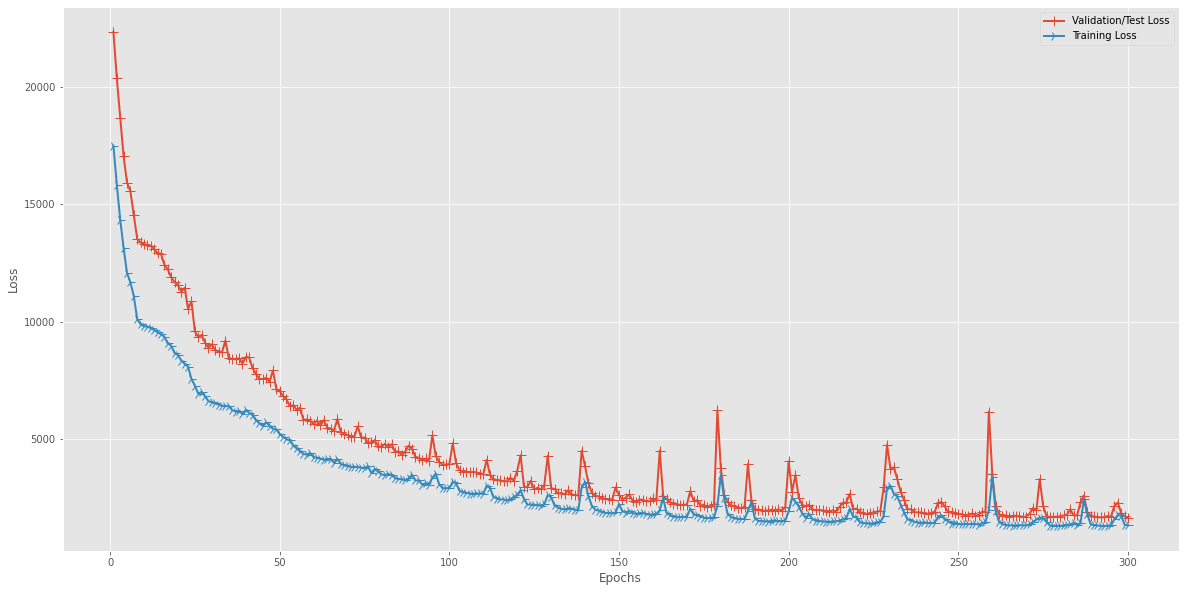

In [23]:
# print(history.history.keys())
# Plotting our loss charts
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.style.use("ggplot")

history_dict = hitory.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig('Loss_DAE.png', dpi = 1200)
plt.show()

In [25]:
preds=autoencoder.predict(x_train)
loss=autoencoder.evaluate(x_test,preds)

5/5 [==============================] - 0s 899us/step - loss: 1302.3857


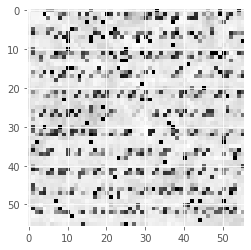

In [33]:
predicted=preds[0].reshape(56,56)
# predicted=cv2.resize(predicted,(224,224))
plt.imshow(predicted,cmap="gray")
plt.show()